In [308]:
import sys
import numpy as np
import matplotlib.pyplot as plt
 
 # Define global variables
 
NumTracks = 200
track_length = 500
maximum_lag = track_length-1
tstp = 0.012

def CreateRW(r,track_length):
    # Creats a random walk for a given track_length
    x = np.zeros(track_length)
    y = np.zeros(track_length)
    for i in range (1,track_length):
        theta = np.random.randint(0,180)
        x[i] = x[i-1] + r*np.cos(theta)
        y[i] = y[i-1] + r*np.sin(theta)
    return x,y

def Calculate_SD(x,y,track_length):
    # Calculates square displacement per lag
    sd = np.zeros([track_length,track_length])
    for lag in range(1,track_length):
        nsteps = (track_length-1)-lag+1
        sp=0
        for jk in range(0,nsteps):
            val = np.square(x[sp+lag]-x[sp]) + np.square(y[sp+lag]-y[sp])
            sd[lag,jk] = val
            sp = sp+1
    return sd


def Calculate_MSD(sd,track_length):
   # Calculated mean square displacement per lag
    msd = np.zeros(track_length)
    for ik in range(0,track_length):
        msd[ik] = np.mean(sd[ik,0:track_length-ik])
    return msd
 
    
def Calculate_Displacement(x,y,maximum_lag):
    # Calculated Displacement for a track.
    proxy = np.square(x[maximum_lag]-x[0])+np.square(y[maximum_lag]-y[0])
    FD = np.sqrt(proxy)
    return FD

def Calculate_Track_Directionality_Ratio(x,y,maximum_lag):
    # Calculate displacement at every lag along the track
    # as origin of tracks is (0,0)
    d = np.sqrt(np.square(x)+np.square(y))
    # Calculate total distance traveled per lag  by summing up 
    # single lag displacements along the track
    D = np.zeros(maximum_lag)
    sp=0
    for jk in range(1,maximum_lag):
        proxy = np.square(x[sp+1]-x[sp])+np.square(y[sp+1]-y[sp])
        D[jk]= np.sqrt(proxy)
        sp=sp+1
    # Now calculate Directionality along the track
    # d@lag/D@lag
    value1 = np.zeros(maximum_lag)
    directionality = np.zeros(maximum_lag)   
    for ik in range(1,maximum_lag):
        value1[ik]= sum(D[0:ik+1])
        directionality[ik]=np.true_divide(d[ik],value1[ik])
    return d,D,directionality
    
            
def PlotWalk(x,y):
    fig1 = plt.figure()
    ax = fig1.add_subplot(1,1,1)
    ax.scatter(x,y)
    return plt.show()
    
def Plot_Lags_MeanMSD(mean_msd,lags,maximum_lag):
    fig2 = plt.figure()
    ax1= fig2.add_subplot(1,1,1)
    ax1.scatter(lags[1:maximum_lags],mean_msd[1:maximum_lags])
    return plt.show()  


In [309]:

    
all_tracks_msd = np.zeros([NumTracks,track_length]);
all_tracks_directionality = np.zeros([NumTracks,maximum_lag])

    
for jk in range(0,NumTracks):
    [x,y] = CreateRW(2,track_length)
    sd = Calculate_SD(x,y,track_length)
    msd = Calculate_MSD(sd,track_length)
    all_tracks_msd[jk,:]=msd
    [d,D,directionality]=Calculate_Track_Directionality_Ratio(x,y,maximum_lag)
    all_tracks_directionality[jk,:]=directionality    


In [322]:
mean_msd = np.mean(all_tracks_msd,0)
mean_direct = np.mean(all_tracks_directionality,0)
lags = np.arange(1,track_length)

mean_direct

array([ 0.        ,  1.        ,  0.68614095,  0.56039093,  0.48315316,
        0.41458014,  0.38109028,  0.35656822,  0.33299294,  0.31221308,
        0.28740859,  0.26828978,  0.25721982,  0.24264214,  0.23615417,
        0.22960223,  0.21913246,  0.21459216,  0.20325424,  0.19891432,
        0.19548486,  0.18863939,  0.18427937,  0.18216739,  0.17913628,
        0.17621897,  0.17335759,  0.16841946,  0.16437591,  0.16265047,
        0.15755416,  0.15485514,  0.15393095,  0.15039699,  0.15039391,
        0.14858355,  0.14737181,  0.14389626,  0.14241744,  0.14138174,
        0.13862603,  0.13677605,  0.13576884,  0.13594147,  0.13289986,
        0.13247398,  0.13136081,  0.12946347,  0.12820834,  0.12995019,
        0.1288516 ,  0.1270106 ,  0.12631232,  0.12611898,  0.12432458,
        0.12397585,  0.12352102,  0.1220584 ,  0.12112317,  0.12028747,
        0.11798477,  0.1157434 ,  0.11399066,  0.11377381,  0.11413893,
        0.11463715,  0.11375409,  0.11284228,  0.11184767,  0.11

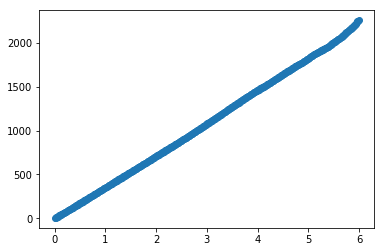

In [331]:
fig = plt.figure()
ax= fig.add_subplot(1,1,1)
ax.scatter(lags*tstp,mean_msd[1:track_length])
plt.show()


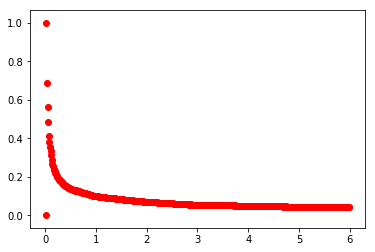

In [333]:
fig = plt.figure()
ax= fig.add_subplot(1,1,1)
ax.scatter(lags*tstp,mean_direct, c ='r')
plt.show()


In [291]:
0.6559*0.6559

0.43020481000000005

In [86]:
xx.shape

(100,)

In [187]:
sum(xx[1:4])

5.9595049494368872

In [97]:
lags = np.arange(1,track_length)
len(xx)

100

In [98]:
fig2 = plt.figure()
ax = fig2.add_subplot(1,1,1)
ax.scatter(lags,xx[1:track_length])

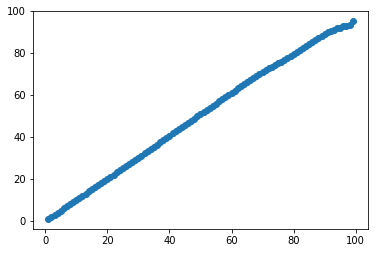

In [99]:
plt.show()


In [116]:
[x1,y1]= CreateRW(20)

In [117]:
x1

array([ 0.        ,  0.99859007,  1.42276908,  1.59448642,  0.71902696,
        0.33532852,  0.71083812,  0.01794229,  0.62347017, -0.25198929,
       -1.24432476, -1.46806571, -1.48134246, -2.16136595, -2.1746427 ,
       -2.48366543, -2.26856016, -1.75838311, -2.17452995, -3.08566021])

In [118]:
y1

array([ 0.        ,  0.05308359, -0.85249477, -1.83764104, -1.35434947,
       -2.27780792, -1.35098941, -0.6299517 ,  0.16587239,  0.64916396,
        0.77273708, -0.20191157,  0.79800029,  1.53119061,  2.53110247,
        3.48215713,  4.45874799,  5.3188174 ,  6.22811483,  6.64023331])

In [120]:
np.square(np.diff(x1))+np.square(np.diff(y1))

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.])